In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/dataset ml/rain_data/rain_in_tunis_prepared.csv')
data.head()

,Day,T,TM,Tm,H,PP,VV,V,VM,RA,SN,TS,FG,month,year,RA_tomor
0,1,11.8,14.4,-1.8,88.0,0.51,7.7,13.7,25.9,1,0,0,0,1,2008,0
1,2,11.2,16.0,8.0,80.0,1.78,9.2,8.9,13.0,0,0,0,0,1,2008,0
2,3,12.4,18.6,-2.3,72.0,0.00,8.5,10.0,16.5,0,0,0,0,1,2008,1
3,4,12.6,15.0,10.0,66.0,0.00,8.0,13.3,27.8,1,0,0,0,1,2008,0
4,5,12.7,18.0,10.0,81.0,0.51,7.7,6.3,11.1,0,0,0,0,1,2008,0


In [3]:
data.describe()

,Day,T,TM,Tm,H,PP,VV,V,VM,RA,SN,TS,FG,month,year,RA_tomor
count,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000
mean,15.727948,19.713867,25.088480,15.041893,64.550166,1.281107,9.797849,13.066888,25.378115,0.275181,0.002738,0.105222,0.008801,6.521416,2014.498338,0.274985
std,8.799770,6.269608,7.152703,5.946619,11.917372,5.035130,0.877899,5.557599,8.266680,0.446649,0.052260,0.306869,0.093410,3.448648,4.031280,0.446551
min,1.000000,5.100000,7.700000,-6.500000,19.000000,0.000000,2.400000,1.300000,7.600000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000
25%,8.000000,14.300000,19.000000,10.000000,56.000000,0.000000,9.500000,8.900000,18.300000,0.000000,0.000000,0.000000,0.000000,4.000000,2011.000000,0.000000
50%,16.000000,19.100000,24.500000,14.700000,65.000000,0.000000,10.000000,12.000000,24.100000,0.000000,0.000000,0.000000,0.000000,7.000000,2014.000000,0.000000
75%,23.000000,25.300000,31.000000,20.200000,73.000000,0.250000,10.000000,16.500000,31.300000,1.000000,0.000000,0.000000,0.000000,10.000000,2018.000000,1.000000
max,31.000000,37.500000,49.000000,29.000000,95.000000,108.460000,11.400000,39.400000,68.300000,1.000000,1.000000,1.000000,1.000000,12.000000,2021.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(data, test_size=0.2,stratify=data['RA_tomor'] ,random_state=25)

In [5]:
training_data.to_csv('train_set_rain.csv',index=False)
testing_data.to_csv('test_set_rain.csv',index=False)

In [6]:
training_data

,Day,T,TM,Tm,H,PP,VV,V,VM,RA,SN,TS,FG,month,year,RA_tomor
4767,19,10.9,16.4,7.0,67.0,0.51,10.0,7.6,14.8,0,0,0,0,1,2021,0
5002,11,26.2,30.3,23.8,65.0,6.10,10.0,18.9,31.7,0,0,0,0,9,2021,0
5016,25,28.7,33.4,24.4,70.0,0.00,10.0,13.1,20.6,0,0,0,0,9,2021,0
1423,24,16.8,20.5,14.9,80.0,0.51,10.8,10.9,20.6,0,0,0,0,11,2011,1
3546,16,27.8,36.7,23.0,54.0,0.00,9.8,9.8,29.4,0,0,0,0,9,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,16,17.4,22.0,15.0,84.0,0.00,9.0,12.4,22.2,1,0,0,0,4,2010,1
144,24,25.9,36.7,17.8,53.0,0.00,9.8,17.2,31.3,0,0,0,0,5,2008,0
4699,12,19.9,27.0,14.7,65.0,0.00,9.2,6.7,14.8,0,0,0,0,11,2020,0
1634,22,29.3,37.0,23.0,35.0,0.00,11.1,13.0,27.8,0,0,0,0,6,2012,0


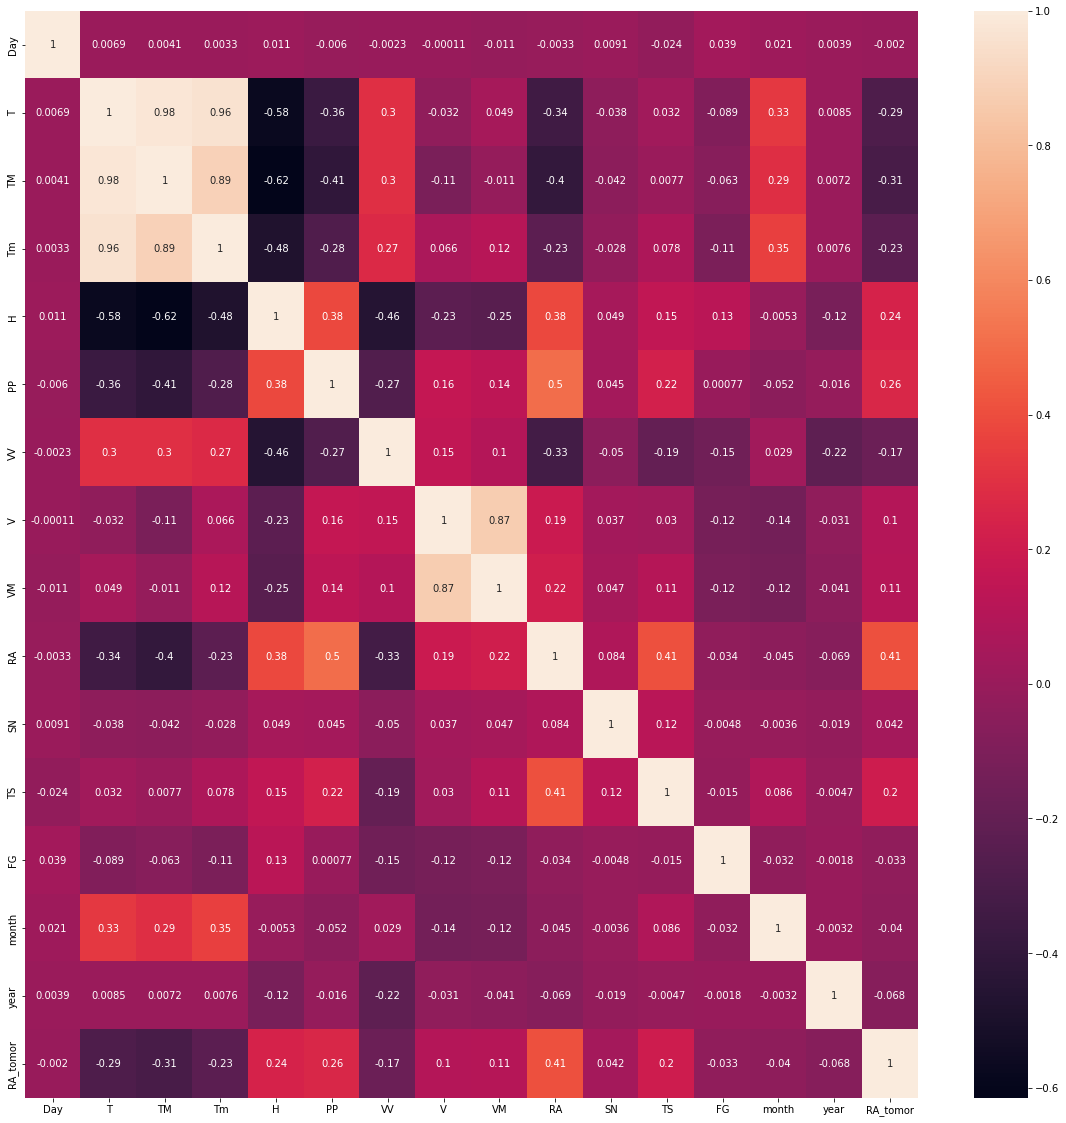

In [7]:
corrmat = training_data.corr(method = "spearman")
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

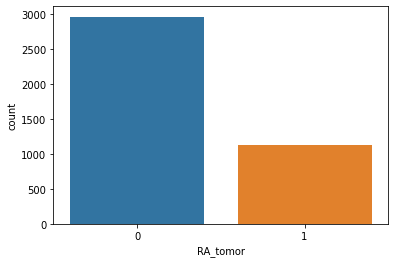

In [8]:
sns.countplot(x='RA_tomor',data=training_data)

In [9]:
X_train=training_data.drop(['Day','T','Tm','V','RA_tomor'],axis=1)
X_train.head()

,TM,H,PP,VV,VM,RA,SN,TS,FG,month,year
4767,16.4,67.0,0.51,10.0,14.8,0,0,0,0,1,2021
5002,30.3,65.0,6.10,10.0,31.7,0,0,0,0,9,2021
5016,33.4,70.0,0.00,10.0,20.6,0,0,0,0,9,2021
1423,20.5,80.0,0.51,10.8,20.6,0,0,0,0,11,2011
3546,36.7,54.0,0.00,9.8,29.4,0,0,0,0,9,2017


In [10]:
y_train=training_data['RA_tomor']

In [11]:
X_test=testing_data.drop(['Day','T','Tm','V','RA_tomor'],axis=1)
y_test=testing_data['RA_tomor']
X_test.head()

,TM,H,PP,VV,VM,RA,SN,TS,FG,month,year
3563,25.7,81.0,18.29,9.7,18.3,1,0,0,0,10,2017
164,29.0,54.0,0.00,11.1,40.7,0,0,0,0,6,2008
2897,22.0,73.0,0.51,7.9,14.8,0,0,0,0,12,2015
4287,28.0,67.0,0.00,10.0,18.3,0,0,0,0,9,2019
3150,34.0,63.0,0.00,10.0,22.2,0,0,0,0,8,2016


In [12]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(sum(y_train)))
print("The number of classes after fit {}".format(sum(y_train_res)))

The number of classes before fit 1125
The number of classes after fit 2965


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf=RandomForestClassifier()
y_train_pred1 = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
confusion_matrix(y_train, y_train_pred1)

array([[2627,  338],
       [ 639,  486]])

In [15]:
print(accuracy_score(y_train,y_train_pred1))
print(classification_report(y_train,y_train_pred1))

0.7611246943765281
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2965
           1       0.59      0.43      0.50      1125

    accuracy                           0.76      4090
   macro avg       0.70      0.66      0.67      4090
weighted avg       0.75      0.76      0.75      4090



In [16]:
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
y_train_pred2 = cross_val_predict(lg_clf, X_train_res, y_train_res, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
print(confusion_matrix(y_train_res, y_train_pred2))
print(accuracy_score(y_train_res,y_train_pred2))
print(classification_report(y_train_res,y_train_pred2))

[[2050  915]
 [1100 1865]]
0.6602023608768971
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      2965
           1       0.67      0.63      0.65      2965

    accuracy                           0.66      5930
   macro avg       0.66      0.66      0.66      5930
weighted avg       0.66      0.66      0.66      5930



In [18]:
from xgboost import XGBClassifier
xg_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
y_train_pred3 = cross_val_predict(xg_clf, X_train_res, y_train_res, cv=3)

In [19]:
print(confusion_matrix(y_train_res, y_train_pred3))
print(accuracy_score(y_train_res,y_train_pred3))
print(classification_report(y_train_res,y_train_pred3))

[[2405  560]
 [ 914 2051]]
0.7514333895446881
              precision    recall  f1-score   support

           0       0.72      0.81      0.77      2965
           1       0.79      0.69      0.74      2965

    accuracy                           0.75      5930
   macro avg       0.76      0.75      0.75      5930
weighted avg       0.76      0.75      0.75      5930



In [20]:
xg_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xg_clf.fit(X_train_res,y_train_res)
y_pred=xg_clf.predict(X_test)

In [21]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[579 163]
 [128 153]]
0.7155425219941349
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       742
           1       0.48      0.54      0.51       281

    accuracy                           0.72      1023
   macro avg       0.65      0.66      0.66      1023
weighted avg       0.73      0.72      0.72      1023



In [22]:
import pickle
pickle.dump(xg_clf, open("model.pkl", "wb"))